<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme du lagrangien augmenté </h1>
</center>

## Implémentation

1. Implémenter l'algorithme du lagrangien augmenté, en utilisant les différentes méthodes
qui ont été vues en première partie pour la résolution de la suite de problèmes sans
contraintes (fichier `src/lagrangien_augmente.jl`). La spécification est donnée dans le fichier.
2. Vérifier que les tests ci-dessous passent.
 

In [1]:
include("../src/lagrangien_augmente.jl")
include("../test/tester_lagrangien_augmente.jl")

#
afficher = true # si true, alors affiche les résultats des algorithmes

#
tester_lagrangien_augmente(lagrangien_augmente, afficher);

Affichage des résultats des algorithmes : true

-------------------------------------------------------------------------
Résultats de : LA et newton appliqué à f1:
  * x0       = [0, 1, 1]
  * x_sol    = [0.5000042424566808, 1.2499978787716595, 0.5000042424566811]
  * f(x_sol) = 2.249961818051857
  * nb_iters = 7
  * flag     = 0
  * solution = [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
Résultats de : LA et newton appliqué à f1:
  * x0       = [0.5, 1.25, 1.0]
  * x_sol    = [0.5000042424566808, 1.2499978787716595, 0.5000042424566811]
  * f(x_sol) = 2.249961818051857
  * nb_iters = 7
  * flag     = 0
  * solution = [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
Résultats de : LA et newton appliqué à f2:
  * x0       = [1, 0]
  * x_sol    = [0.9072338859288741, 0.8227553207255176]
  * f(x_sol) = 0.008615664513970852
  * nb_iters = 5
  * flag     = 0
  * solution = [0.9072339605110892, 0.82275545

## Interprétation

 1. Commenter les résultats obtenus, en étudiant notamment les valeurs en sortie de $\lambda_k$ et $\mu_k$.
 2. Étudier l'influence du paramètre $\tau$ dans la performance de l'algorithme. Pour cela Vous réaliserez des tests numériques.

### Question 1: 
Les valeurs finales de $\lambda_k$ se rapprochent des multiplicateurs de Lagrange de la solution (elles s’ajustent pour faire disparaître la violation de la contrainte), tandis que $\mu_k$ croît si la contrainte n’est pas suffisamment respectée. Concrètement :

- **Si** $\|c(x_{k+1})\| \le \eta_k$, on met à jour $\lambda_{k+1} = \lambda_k + \mu_k\, c(x_{k+1})$ mais **pas** $\mu_k$, car la contrainte est jugée « bien » satisfaite.  
- **Sinon**, on augmente $\mu_{k+1} = \tau\,\mu_k$  (pour pénaliser plus fortement la contrainte) et $\lambda_{k+1} = \lambda_k$ reste inchangé.

Au fur et à mesure, $\mu_k$ devient assez grand pour « forcer » la satisfaction de la contrainte et $\lambda_k$ converge vers le multiplicateur de Lagrange idéal.


### Question 2:

τ = 1.1 => nb_iters = 31,  x_sol = [0.9072339605110297, 0.822755456314442], f_sol = 0.008615650659919484, flag = 0
τ = 1.5 => nb_iters = 12,  x_sol = [0.9072339605110453, 0.8227554563144704], f_sol = 0.00861565065991658, flag = 0
τ = 2.0 => nb_iters = 10,  x_sol = [0.9072339605110836, 0.82275545631454], f_sol = 0.008615650659909473, flag = 0
τ = 2.5 => nb_iters = 9,  x_sol = [0.9072339605110827, 0.8227554563145384], f_sol = 0.008615650659909631, flag = 0
τ = 3.0 => nb_iters = 8,  x_sol = [0.9072339605109699, 0.8227554563143334], f_sol = 0.00861565065993058, flag = 0


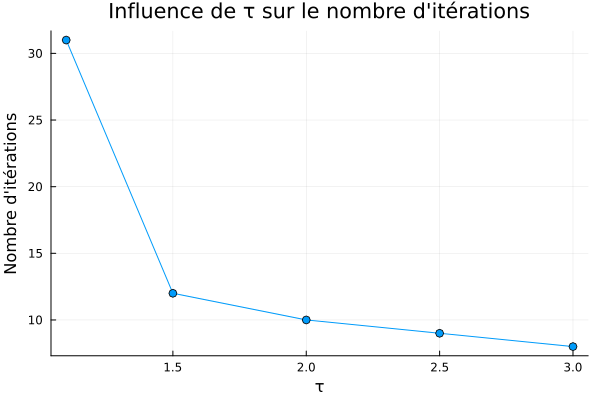

In [2]:
using LinearAlgebra
using Plots

include("../src/lagrangien_augmente.jl")
include("../test/tester_lagrangien_augmente.jl")

function etudier_influence_tau_LA()
    # Quelques valeurs de τ à tester
    taus = [1.1,1.5, 2, 2.5, 3]

    nb_iters_list = Float64[]

    x0 = [10, 10]  # Pour visualiser l'influence, j'ai pris un point loin de la solution
    tol_abs = 1e-12
    tol_rel = 1e-12

    # Boucle sur les différentes valeurs de τ
    for tau_val in taus
        x_sol, f_sol, flag, nb_iters, mus, lambdas = lagrangien_augmente(
            fct2, grad_fct2, hess_fct2,
            contrainte2, grad_contrainte2, hess_contrainte2,
            x0;
            max_iter=1000,
            tol_abs=tol_abs,
            tol_rel=tol_rel,
            λ0=2.0,       
            μ0=2.0,       
            τ=tau_val,     # valeur testée
            algo_noc="newton"  # j'ai choisi la methode de newton
        )
        push!(nb_iters_list, nb_iters)
        println("τ = $tau_val => nb_iters = $nb_iters,  x_sol = $x_sol, f_sol = $f_sol, flag = $flag")
    end

    p = plot(
        taus, nb_iters_list,
        xlabel = "τ",
        ylabel = "Nombre d'itérations",
        marker = :o,
        legend = false,
        title = "Influence de τ sur le nombre d'itérations"
    )
    display(p)
end

etudier_influence_tau_LA()


#### Interpretation du résultat : 
On voit clairement qu’en partant d’un $ \tau $ petit (1.1), il faut 30 itérations pour converger, puis le nombre d’itérations chute rapidement à mesure qu’on augmente $ \tau $. Au-delà de 2.0, la courbe se stabilise autour de 8 itérations.

Cela illustre que plus $ \tau $ est grand, plus la pénalisation grandit vite, et moins d’itérations sont nécessaires pour satisfaire la contrainte. Mais une fois $ \tau $ suffisamment élevé, l’effet stagne : des valeurs plus grandes de $ \tau $ n’apportent plus beaucoup de gain supplémentaire.
